In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras import optimizers
from keras import utils
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

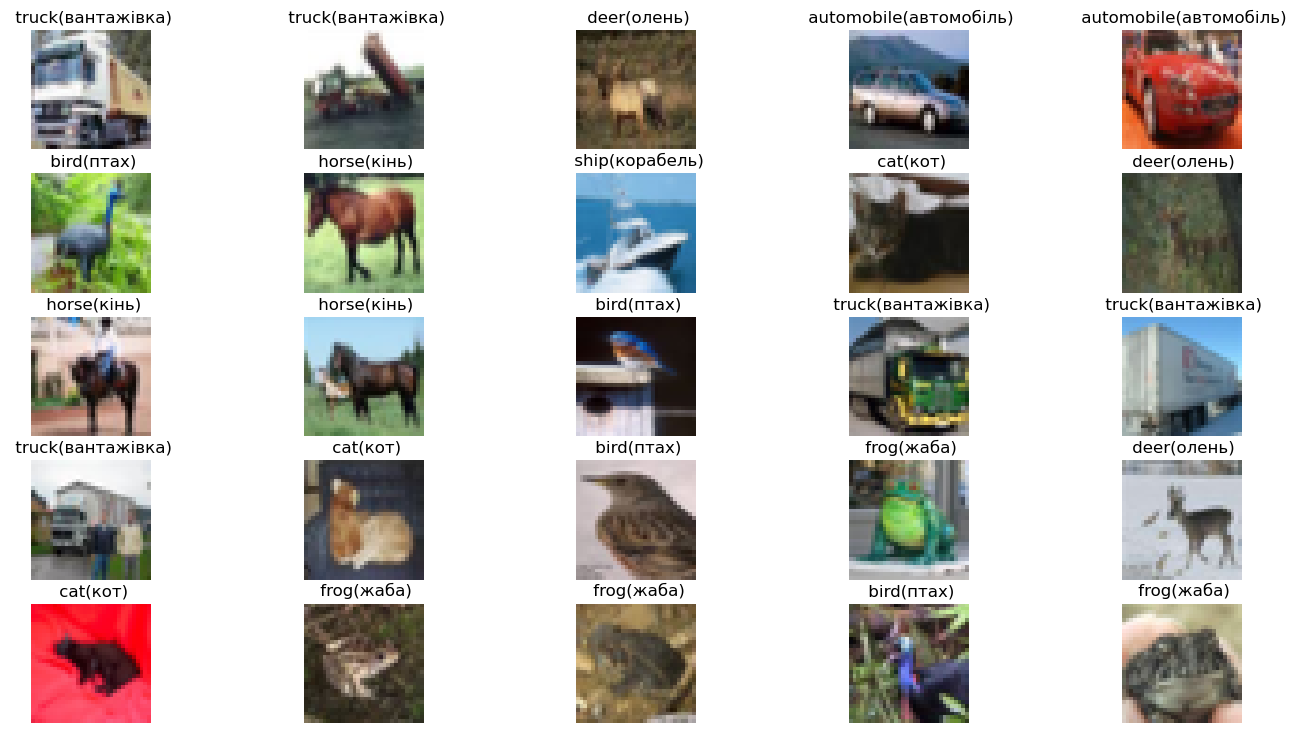

In [4]:

plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")


In [4]:
# Преобразование размерности изображений

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Преобразуем метки в категории


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (45000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (45000, 10), y_test: (10000, 10)


In [5]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False


In [6]:
model = models.Sequential([
                          #  layers.Input(original_dim),
                          #  layers.Lambda(lambda image: tf.image.resize(image, target_size)),
                           conv_base,

                           layers.Flatten(),
                           layers.BatchNormalization(),

                        #    layers.Dropout(0.2),
                           layers.Dense(256, activation="relu", kernel_initializer="he_uniform"),

                           layers.Dropout(0.3),
                           layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
                           layers.Dropout(0.3),

                           layers.Dense(10, activation="softmax"), ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [8]:
model.compile(  loss="binary_crossentropy",
                optimizer=Adam(learning_rate=0.0005),
                metrics=["accuracy"])

In [23]:
# history = model.fit(train_generator,
#                     epochs=10,
#                     steps_per_epoch=150,
#                     validation_data=validation_generator,
#                     validation_steps=64,
#                     batch_size=64,
#                     validation_split=0.2 ,
#                     shuffle=True)
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_val, y_val), 
                    # steps_per_epoch=150,
                    # validation_steps=64,
                    batch_size=128,
                    # validation_split=0.2 ,
                    shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 231s 148ms/step - loss: 0.2028 - accuracy: 0.5506
Epoch 2/20
1563/1563 [==============================] - 204s 130ms/step - loss: 0.1847 - accuracy: 0.5964
Epoch 3/20
1563/1563 [==============================] - 218s 140ms/step - loss: 0.1742 - accuracy: 0.6251
Epoch 4/20
1563/1563 [==============================] - 214s 137ms/step - loss: 0.1658 - accuracy: 0.6420
Epoch 5/20
1563/1563 [==============================] - 202s 129ms/step - loss: 0.1585 - accuracy: 0.6595
Epoch 6/20
1563/1563 [==============================] - 204s 131ms/step - loss: 0.1514 - accuracy: 0.6780
Epoch 7/20
1563/1563 [==============================] - 204s 131ms/step - loss: 0.1450 - accuracy: 0.6921
Epoch 8/20
1563/1563 [==============================] - 206s 132ms/step - loss: 0.1387 - accuracy: 0.7065
Epoch 9/20
1563/1563 [==============================] - 206s 132ms/step - loss: 0.1320 - accuracy: 0.7218
Epoch 10/20
1563/1563 [=======================

In [34]:
model_test_acc=model.evaluate(x_test,y_test, batch_size=128)
model_test_acc

79/79 [==============================] - 29s 364ms/step - loss: 0.3222 - acc: 0.6120


[0.3221839368343353, 0.6119999885559082]

In [32]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1563/1563 [==============================] - 224s 143ms/step - loss: 0.0476 - acc: 0.9140
Відсоток точності навчальних даних:  91.4


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


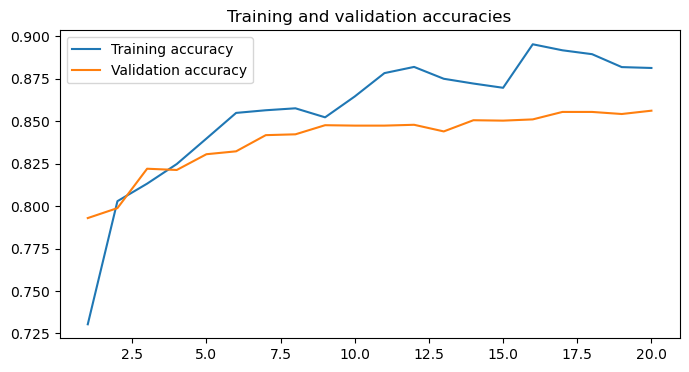

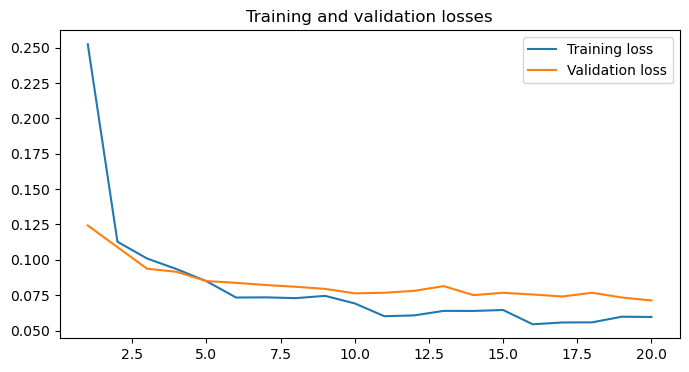

In [ ]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

In [25]:
model.save("vgg16_basesd_model_2_VGG16_14_03.h5")

In [ ]:
# model = models.load_model("models/vgg16_basesd_model_2_VGG16_14_03.hdf5")

Донавчання

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [27]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])


In [30]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["acc"]
)

history = model.fit(
    x_train,y_train,
    steps_per_epoch=150,
    epochs=10,
     verbose=1, batch_size=64, validation_split=0.2
)

Epoch 1/10
150/150 [==============================] - 84s 463ms/step - loss: 0.0531 - acc: 0.9004 - val_loss: 0.0691 - val_acc: 0.8614
Epoch 2/10
150/150 [==============================] - 75s 502ms/step - loss: 0.0570 - acc: 0.8927 - val_loss: 0.0706 - val_acc: 0.8626
Epoch 3/10
150/150 [==============================] - 64s 427ms/step - loss: 0.0594 - acc: 0.8878 - val_loss: 0.0713 - val_acc: 0.8578
Epoch 4/10
150/150 [==============================] - 64s 427ms/step - loss: 0.0599 - acc: 0.8847 - val_loss: 0.0720 - val_acc: 0.8564
Epoch 5/10
150/150 [==============================] - 59s 395ms/step - loss: 0.0502 - acc: 0.9102 - val_loss: 0.0731 - val_acc: 0.8541
Epoch 6/10
150/150 [==============================] - 59s 397ms/step - loss: 0.0518 - acc: 0.9006 - val_loss: 0.0721 - val_acc: 0.8552
Epoch 7/10
150/150 [==============================] - 59s 393ms/step - loss: 0.0523 - acc: 0.9014 - val_loss: 0.0746 - val_acc: 0.8531
Epoch 8/10
150/150 [==============================] - 6

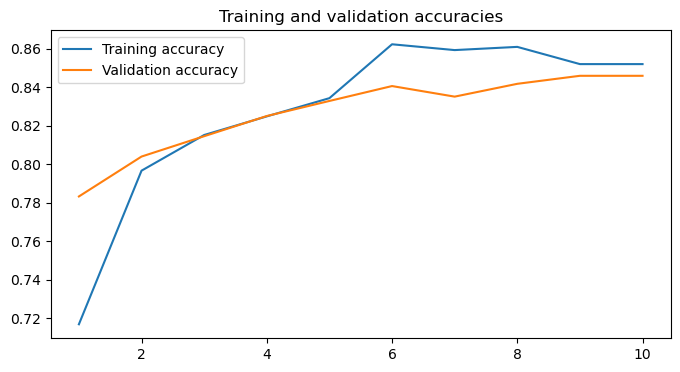

In [ ]:
epochs = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["acc"],   label="Training accuracy")
plt.plot(epochs, history.history["val_acc"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.show()

In [33]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))


1563/1563 [==============================] - 203s 130ms/step - loss: 0.0476 - acc: 0.9140
Відсоток точності навчальних даних:  91.4


In [ ]:
model.save("vgg16_basesd_model_2_donovchanyaVGG_14_03.h5")